# Intro to GenAI: What is a Data Distribution?

<div>
<iframe src="https://slides.com/naresh-ub/cvip-lec-12/embed" width="100%" height="500" title="Intro to GenAI" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div>

## Function Approximators

Neural networks are universal function approximators.  
They learn to model an unknown function $y = f(x)$ by training on pairs of $(x, y)$.  

Given data points:  

$(1, 2), (1.5, 3), (-0.5, -1)$, a network can learn $f$ and predict $y$ for new $x$.  

The goal is to find a function $f$ such that:

$$ y = f(x) $$

In practice, $f$ is parameterized by trainable weights.

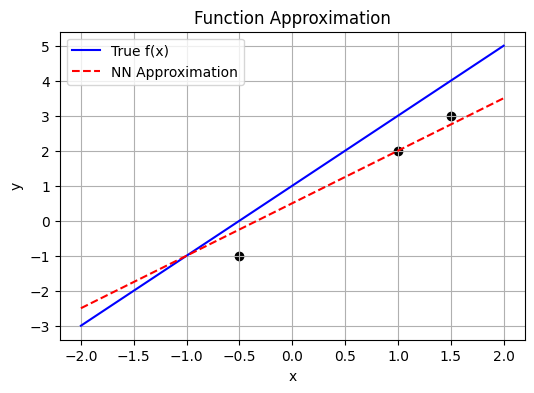

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Toggle ON/OFF
interactive = True  # ⇦ SET TO True or False

# True function to approximate
def true_f(x):
    return 2 * x + 1

# Main plotting logic
def plot_approximation(weight=1.5, bias=0.5):
    x = np.linspace(-2, 2, 100)
    y_true = true_f(x)
    y_pred = weight * x + bias

    plt.figure(figsize=(6, 4))
    plt.plot(x, y_true, label='True f(x)', color='blue')
    plt.plot(x, y_pred, label='NN Approximation', linestyle='--', color='red')
    plt.scatter([1, 1.5, -0.5], [2, 3, -1], color='black')
    plt.title('Function Approximation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive or Static
if interactive:
    interact(
        plot_approximation,
        weight=FloatSlider(value=1.5, min=-5, max=5, step=0.1),
        bias=FloatSlider(value=0.5, min=-5, max=5, step=0.1)
    )
else:
    plot_approximation()

## What is Data Distribution?

Where does data come from?  
Behind any dataset is a hidden data-generating process.

A **random experiment** (like flipping a coin) defines a **random variable** $X$ whose outcomes follow a **probability distribution** $p(x)$.  

For discrete $X$: 

$$ 
P(X = x) = \text{Probability that X takes value x}
$$

For continuous $X$:  

$$
P(a \leq X \leq b) = \int_{a}^{b} p(x) dx
$$

The **PDF** describes how likely different $x$ values are.

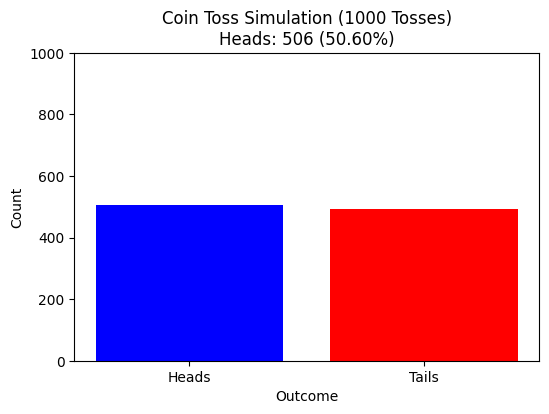

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Function to simulate tossing a fair coin
def simulate_coin_tosses(n_experiments=1000):
    results = np.random.choice([0, 1], size=n_experiments)  # 0 = Tails, 1 = Heads
    heads_count = np.sum(results)  # Count number of heads
    proportion_heads = heads_count / n_experiments  # Proportion of heads

    # Plot distribution
    plt.figure(figsize=(6, 4))
    plt.bar(['Heads', 'Tails'], [heads_count, n_experiments - heads_count], color=['blue', 'red'])
    plt.xlabel("Outcome")
    plt.ylabel("Count")
    plt.title(f"Coin Toss Simulation ({n_experiments} Tosses)\nHeads: {heads_count} ({proportion_heads:.2%})")
    plt.ylim(0, n_experiments)
    plt.show()

# Unified function to handle slider-based or static plotting
def plot_coin_toss_distribution(n_experiments=1000, slider=False):
    if slider:
        slider_widget = widgets.IntSlider(value=n_experiments, min=500, max=5000, step=500, description="Tosses")
        return widgets.interactive(lambda n: plot_coin_toss_distribution(n, slider=False), n=slider_widget)
    
    # Run the simulation and plot the distribution
    simulate_coin_tosses(n_experiments)

# Call the function with a slider
plot_coin_toss_distribution(slider=True)

## Gaussian Distribution and Central Limit Theorem

The **Gaussian distribution**, also called the **Normal distribution**, is a fundamental continuous probability distribution with a bell-shaped curve. Its probability density function (PDF) for a scalar random variable $x$ is:

$$
p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

where:  
- $\mu$ is the mean (the center of the distribution)  
- $\sigma^2$ is the variance (the spread)

The Gaussian is symmetric about $\mu$ and is fully described by its first two moments.

---

**Central Limit Theorem (CLT):**  
The CLT states that **the sum (or average) of a large number of independent and identically distributed (i.i.d.) random variables — regardless of their original distribution — will approximate a Gaussian distribution** as the number of variables grows large. Formally:

$$
\text{If} \quad X_1, X_2, \dots, X_n \text{ are i.i.d. with mean } \mu \text{ and variance } \sigma^2, \quad
\text{then} \quad \frac{1}{n}\sum_{i=1}^n X_i \approx \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)
$$

The CLT explains why the Gaussian appears so frequently in nature and underpins many generative models and statistical inference techniques.

## PDF of a distribution parametrized by Mean and Variance

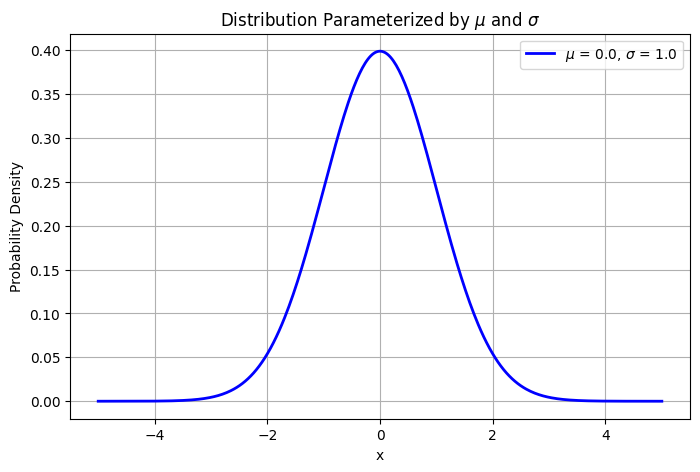

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0.0
sigma = 1.0

# Support
x = np.linspace(-5, 5, 400)

# PDF: Gaussian (Normal) Distribution
pdf = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, color='blue', lw=2, label=rf"$\mu$ = {mu}, $\sigma$ = {sigma}")
plt.title("Distribution Parameterized by $\\mu$ and $\\sigma$")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()

## Sum and Product of Two Gaussians

### Sum of Two Gaussians

If two random variables $X$ and $Y$ are independent and both normally distributed:

$$
X \sim \mathcal{N}(\mu_X, \sigma_X^2), \quad Y \sim \mathcal{N}(\mu_Y, \sigma_Y^2)
$$

then their sum $Z = X + Y$ is also Gaussian:

$$
Z \sim \mathcal{N}(\mu_X + \mu_Y, \; \sigma_X^2 + \sigma_Y^2).
$$

The mean adds and the variances add.

### Product of Two Gaussians

If we multiply the PDFs of two Gaussian distributions (often used in Bayesian updating), the result is proportional to another Gaussian:

$$
p(x) \propto \mathcal{N}(x | \mu_1, \sigma_1^2) \times \mathcal{N}(x | \mu_2, \sigma_2^2).
$$

The product is:

$$
p(x) = \mathcal{N}\Big( x \;|\; \mu', \sigma'^2 \Big)
$$

where:

$$
\sigma'^2 = \left( \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2} \right)^{-1}, 
\quad 
\mu' = \sigma'^2 \left( \frac{\mu_1}{\sigma_1^2} + \frac{\mu_2}{\sigma_2^2} \right).
$$

So the product of two Gaussians is another Gaussian with updated mean and variance.

This property is fundamental for many **Bayesian inference** and **Kalman filter** algorithms.

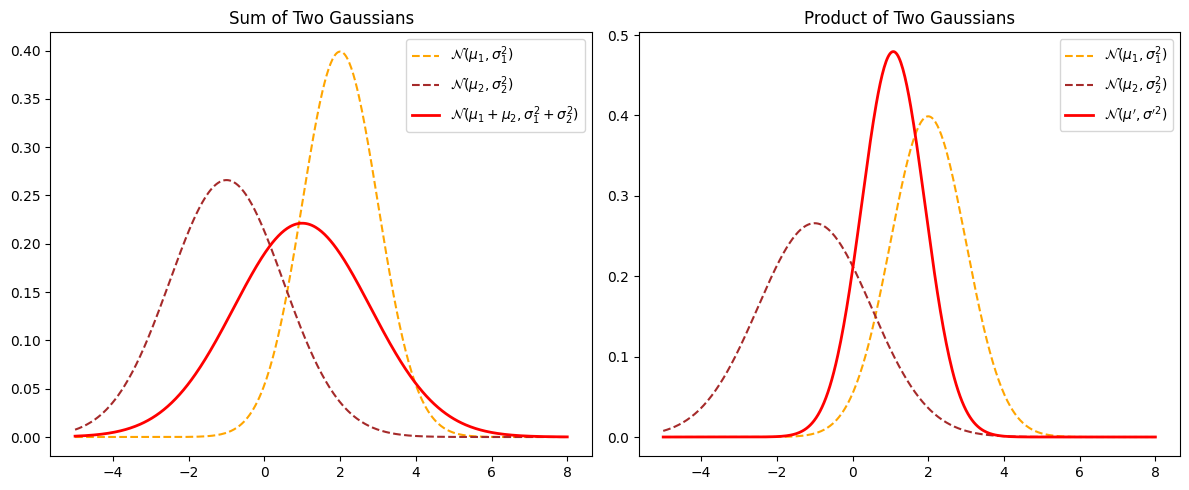

In [23]:
from scipy.stats import norm

# Define parameters for two Gaussian distributions
mu1, sigma1 = 2, 1
mu2, sigma2 = -1, 1.5

# Define the range for plotting
x = np.linspace(-5, 8, 500)

# Compute the PDFs of the two Gaussians
pdf1 = norm.pdf(x, mu1, sigma1)
pdf2 = norm.pdf(x, mu2, sigma2)

# Sum of two independent Gaussians
mu_sum = mu1 + mu2
sigma_sum = np.sqrt(sigma1**2 + sigma2**2)
pdf_sum = norm.pdf(x, mu_sum, sigma_sum)

# Product of two Gaussians (up to a normalization constant)
sigma_prod = np.sqrt((sigma1**2 * sigma2**2) / (sigma1**2 + sigma2**2))
mu_prod = (mu1 * sigma2**2 + mu2 * sigma1**2) / (sigma1**2 + sigma2**2)
pdf_prod = norm.pdf(x, mu_prod, sigma_prod)

# Plot the Gaussians
plt.figure(figsize=(12, 5))

# Subplot for Sum of Gaussians
plt.subplot(1, 2, 1)
plt.plot(x, pdf1, label=r'$\mathcal{N}(\mu_1, \sigma_1^2)$', linestyle='dashed', color='orange')
plt.plot(x, pdf2, label=r'$\mathcal{N}(\mu_2, \sigma_2^2)$', linestyle='dashed', color='brown')
plt.plot(x, pdf_sum, label=r'$\mathcal{N}(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$', linewidth=2, color='red')
plt.title('Sum of Two Gaussians')
plt.legend()

# Subplot for Product of Gaussians
plt.subplot(1, 2, 2)
plt.plot(x, pdf1, label=r'$\mathcal{N}(\mu_1, \sigma_1^2)$', linestyle='dashed', color='orange')
plt.plot(x, pdf2, label=r'$\mathcal{N}(\mu_2, \sigma_2^2)$', linestyle='dashed', color='brown')
plt.plot(x, pdf_prod, label=r'$\mathcal{N}(\mu^\prime, \sigma^{\prime 2})$', linewidth=2, color='red')
plt.title('Product of Two Gaussians')
plt.legend()

plt.tight_layout()
plt.show()

## Expected Value: Definition and Practical Implementation

The expected value (or mean) is a fundamental concept in probability and statistics that represents the long-run average outcome of a random variable.

For a continuous random variable X with probability density function p(x), the expected value is defined as:

$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} x , p(x) , dx
$$

For a discrete random variable:

$$
\mathbb{E}[X] = \sum_{i} x_i , P(X = x_i)
$$

When we only have a finite sample x_1, x_2, \ldots, x_n, the expected value is approximated by the sample mean:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

How this is implemented in the code:
	•	The code generates random samples from a true Gaussian distribution with known mean \mu = 0 and variance \sigma^2 = 1.
	•	The function estimated_function calculates the sample mean and variance, which are empirical estimates of the true expected value and spread.
	•	The plot_estimation function visualizes the true Gaussian PDF alongside the estimated PDF and the histogram of sampled data.
	•	The interactive slider lets you adjust the number of samples n. As n increases, the sample mean converges towards the true mean, illustrating the Law of Large Numbers.

The expected value links the theoretical probability model with real-world data by showing how averages from samples approximate the true mean.

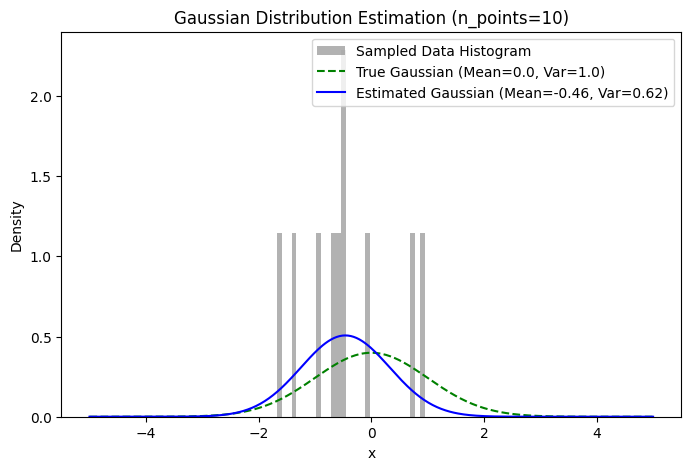

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to generate Gaussian-distributed data
def get_data(n_points=100):
    true_mean = 0.0
    true_variance = 1.0
    data = np.random.normal(true_mean, np.sqrt(true_variance), n_points)  # Generate normal distributed data
    return data, (true_mean, true_variance)

# Function to estimate mean and variance
def estimated_function(data):
    estimated_mean = np.mean(data)
    estimated_variance = np.var(data)
    return estimated_mean, estimated_variance

# Unified function to handle both slider-based and static plotting
def plot_estimation(n_points=100, slider=False, estimated_function=None):
    if slider:
        slider_widget = widgets.IntSlider(value=n_points, min=10, max=50000, step=50, description="n_points")
        return widgets.interactive(lambda n: plot_estimation(n, slider=False, estimated_function=estimated_function), 
                                   n=slider_widget)
    
    if estimated_function is None:
        raise ValueError("You must provide an estimated_function to fit the data.")

    data, (true_mean, true_variance) = get_data(n_points)
    estimated_mean, estimated_variance = estimated_function(data)

    x = np.linspace(-5, 5, 400)

    def gaussian(x, mean, variance):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(- (x - mean) ** 2 / (2 * variance))
    
    y_true = gaussian(x, true_mean, true_variance)
    y_estimated = gaussian(x, estimated_mean, estimated_variance)

    plt.figure(figsize=(8,5))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', label="Sampled Data Histogram")
    plt.plot(x, y_true, 'g--', label=f"True Gaussian (Mean={true_mean}, Var={true_variance})")
    plt.plot(x, y_estimated, 'b-', label=f"Estimated Gaussian (Mean={estimated_mean:.2f}, Var={estimated_variance:.2f})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Gaussian Distribution Estimation (n_points={n_points})")
    plt.show()

plot_estimation(n_points=10, slider=True, estimated_function=estimated_function)

## Interpolation as a Simple Generative Technique

Interpolation is a basic yet powerful concept in generative modeling.
When we interpolate, we create new data points by finding values between existing data points.

For example, given two data points x_1 and x_2, a simple linear interpolation is:

$$
x_{\text{new}} = (1 - \alpha) , x_1 + \alpha , x_2,\quad \alpha \in [0, 1].
$$

By varying \alpha between 0 and 1, we generate a smooth transition between the two original data points.

Why is this useful?
	•	In low dimensions, it helps to fill gaps between sparse data.
	•	In high-dimensional spaces (like images or embeddings), it is used to smoothly blend features.
	•	Many generative models (e.g., VAEs) use interpolation in latent space to show how well the model captures smooth, meaningful variations in data.

Key idea:

Interpolation doesn’t truly create data from scratch, but it extends the dataset by exploiting the structure of known points. It’s a simple starting point for understanding how generative models synthesize new samples.

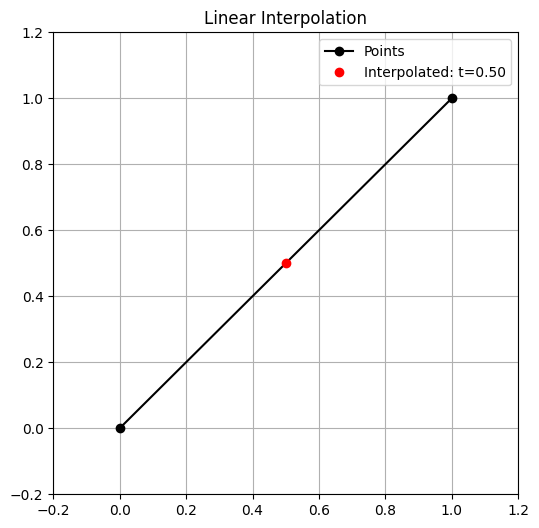

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

interactive = True

def plot_interpolation(t=0.5):
    p0 = np.array([0, 0])
    p1 = np.array([1, 1])
    p = (1 - t) * p0 + t * p1

    plt.figure(figsize=(6, 6))
    plt.plot([p0[0], p1[0]], [p0[1], p1[1]], 'ko-', label='Points')
    plt.plot(p[0], p[1], 'ro', label=f'Interpolated: t={t:.2f}')
    plt.title("Linear Interpolation")
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.grid(True)
    plt.legend()
    plt.show()

if interactive:
    interact(
        plot_interpolation,
        t=FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01)
    )
else:
    plot_interpolation()

## Multivariate Gaussian Distribution

A **multivariate Gaussian distribution** generalizes the normal distribution to multiple dimensions.  
It models a vector of random variables $\mathbf{X} \in \mathbb{R}^d$ that are jointly Gaussian.

### Probability Density Function (PDF)

The PDF of a $d$-dimensional multivariate Gaussian is:

$$
p(\mathbf{x}) = 
\frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}|^{1/2}} 
\exp \left(
- \frac{1}{2} 
(\mathbf{x} - \boldsymbol{\mu})^T 
\boldsymbol{\Sigma}^{-1} 
(\mathbf{x} - \boldsymbol{\mu})
\right)
$$

where:

- $\mathbf{x} \in \mathbb{R}^d$ is the data vector,
- $\boldsymbol{\mu} \in \mathbb{R}^d$ is the mean vector,
- $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ is the covariance matrix,
- $|\boldsymbol{\Sigma}|$ denotes the determinant of the covariance matrix,
- $\boldsymbol{\Sigma}^{-1}$ is its inverse.

---

### Key Properties

- The **mean vector** $\boldsymbol{\mu}$ defines the center of the distribution.
- The **covariance matrix** $\boldsymbol{\Sigma}$ encodes the variance of each dimension and the correlations between dimensions.
- If variables are uncorrelated, $\boldsymbol{\Sigma}$ is diagonal.

The multivariate Gaussian is fundamental for modeling high-dimensional continuous data and is widely used in generative modeling, probabilistic PCA, and Bayesian statistics.

In [21]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import os
from IPython.display import IFrame, display

# === Render Mode ===
render_mode = 'iframe'
pio.renderers.default = 'iframe' if render_mode == 'iframe' else 'vscode'

# === Multivariate Gaussian Parameters ===
mu = np.array([0, 0])  # Mean vector
Sigma = np.array([[1, 0.5],
                  [0.5, 1]])  # Covariance matrix

# === Mesh Grid ===
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# === Multivariate Gaussian PDF ===
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2 * np.pi) ** n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos - mu, Sigma_inv, pos - mu)
    return np.exp(-fac / 2) / N

Z = multivariate_gaussian(pos, mu, Sigma)

# === Plotly Surface ===
surface = go.Surface(x=X, y=Y, z=Z, colorscale='Viridis')

fig = go.Figure(data=[surface])

fig.update_layout(
    title='Multivariate Gaussian PDF',
    scene=dict(
        xaxis_title='X₁',
        yaxis_title='X₂',
        zaxis_title='Density',
        xaxis=dict(backgroundcolor='white', gridcolor='lightgray'),
        yaxis=dict(backgroundcolor='white', gridcolor='lightgray'),
        zaxis=dict(backgroundcolor='white', gridcolor='lightgray'),
        aspectmode='cube'
    ),
    margin=dict(l=0, r=0, t=40, b=40)
)

# === Export and Display ===
if render_mode == 'iframe':
    folder = "iframe_figures"
    filename = "multivariate_gaussian_pdf.html"
    os.makedirs(folder, exist_ok=True)
    file_path = os.path.join(folder, filename)
    fig.write_html(file_path, include_plotlyjs='cdn', full_html=True)
    display(IFrame(src=file_path, width='100%', height='500'))
else:
    fig.show()

## t-SNE: How It Works & How This Code Implements It

**What is t-SNE?**  
- **t-SNE** (t-Distributed Stochastic Neighbor Embedding) is a **nonlinear dimensionality reduction** technique for **visualizing high-dimensional data** in 2D or 3D.
- It preserves **local structure**: points close in high-dimensional space remain close in the low-dimensional map.
- It works by converting pairwise distances into **probability distributions**:
  - In the high-dimensional space, similar points have higher conditional probability of being neighbors.
  - In the low-dimensional map, a similar distribution is constructed.
  - The algorithm minimizes the **Kullback-Leibler (KL) divergence** between these two distributions.

---

**Key Steps in t-SNE**

**Compute pairwise distances**  
   - Uses squared Euclidean distance.

**Convert distances to probabilities**  
   - High-dimensional distances → conditional probabilities via a Gaussian kernel.
   - Each point’s bandwidth (`sigma`) is found via **binary search** so its **perplexity** matches the target value (controls effective neighborhood size).

**Map to low dimensions**  
   - Points are initialized randomly in 2D.
   - Gradient descent adjusts positions to match the high- and low-dimensional probability distributions.

**Symmetrize probabilities**  
   - Conditional probabilities are symmetrized to form joint probabilities.

**Cost function**  
   - KL divergence measures how well the low-dimensional map matches the high-dimensional similarities.

**How This Code Implements It**

`neg_squared_euc_dists` — Computes negative squared Euclidean distances between points.

`find_optimal_sigmas` + `binary_search` — Finds the best `sigma` for each point to match the target perplexity.

`p_joint` — Computes the high-dimensional joint probability matrix.

`q_tsne` or `q_joint` — Computes the low-dimensional probability matrix (uses Student-t kernel for t-SNE).

`estimate_sne` — Runs gradient descent to adjust the embedding.

`tsne_grad` or `symmetric_sne_grad` — Computes the gradient of the cost function.

`plot_embedding` — Plots the final 2D embedding **and labels each cluster at its mean**.

**Result:**  
This notebook loads digit data, computes a meaningful 2D embedding with t-SNE or SNE, and plots all classes clearly labeled at their cluster centers.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def neg_squared_euc_dists(X):
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    return -D

def softmax(X, diag_zero=True):
    e_x = np.exp(X - np.max(X, axis=1).reshape([-1, 1]))
    if diag_zero:
        np.fill_diagonal(e_x, 0.)
    e_x = e_x + 1e-8
    return e_x / e_x.sum(axis=1).reshape([-1, 1])

def calc_prob_matrix(distances, sigmas=None):
    if sigmas is not None:
        two_sig_sq = 2. * np.square(sigmas.reshape((-1, 1)))
        return softmax(distances / two_sig_sq)
    else:
        return softmax(distances)

def binary_search(eval_fn, target, tol=1e-10, max_iter=10000, lower=1e-20, upper=1000.):
    for _ in range(max_iter):
        guess = (lower + upper) / 2.
        val = eval_fn(guess)
        if val > target:
            upper = guess
        else:
            lower = guess
        if np.abs(val - target) <= tol:
            break
    return guess

def calc_perplexity(prob_matrix):
    entropy = -np.sum(prob_matrix * np.log2(prob_matrix), 1)
    perplexity = 2 ** entropy
    return perplexity

def perplexity(distances, sigmas):
    return calc_perplexity(calc_prob_matrix(distances, sigmas))

def find_optimal_sigmas(distances, target_perplexity):
    sigmas = []
    for i in range(distances.shape[0]):
        eval_fn = lambda sigma: perplexity(distances[i:i+1, :], np.array(sigma))
        correct_sigma = binary_search(eval_fn, target_perplexity)
        sigmas.append(correct_sigma)
    return np.array(sigmas)

def q_joint(Y):
    distances = neg_squared_euc_dists(Y)
    exp_distances = np.exp(distances)
    np.fill_diagonal(exp_distances, 0.)
    return exp_distances / np.sum(exp_distances), None

def p_conditional_to_joint(P):
    return (P + P.T) / (2. * P.shape[0])

def p_joint(X, target_perplexity):
    distances = neg_squared_euc_dists(X)
    sigmas = find_optimal_sigmas(distances, target_perplexity)
    p_conditional = calc_prob_matrix(distances, sigmas)
    P = p_conditional_to_joint(p_conditional)
    return P

def symmetric_sne_grad(P, Q, Y, _):
    pq_diff = P - Q
    pq_expanded = np.expand_dims(pq_diff, 2)
    y_diffs = np.expand_dims(Y, 1) - np.expand_dims(Y, 0)
    grad = 4. * (pq_expanded * y_diffs).sum(1)
    return grad

def tsne_grad(P, Q, Y, inv_distances):
    pq_diff = P - Q
    pq_expanded = np.expand_dims(pq_diff, 2)
    y_diffs = np.expand_dims(Y, 1) - np.expand_dims(Y, 0)
    distances_expanded = np.expand_dims(inv_distances, 2)
    y_diffs_wt = y_diffs * distances_expanded
    grad = 4. * (pq_expanded * y_diffs_wt).sum(1)
    return grad

def q_tsne(Y):
    distances = neg_squared_euc_dists(Y)
    inv_distances = 1. / (1. - distances)
    np.fill_diagonal(inv_distances, 0.)
    Q = inv_distances / np.sum(inv_distances)
    return Q, inv_distances

def estimate_sne(X, P, rng, num_iters, q_fn, grad_fn, learning_rate, momentum):
    Y = rng.normal(0., 0.0001, [X.shape[0], 2])
    if momentum:
        Y_m2 = Y.copy()
        Y_m1 = Y.copy()
    for _ in range(num_iters):
        Q, distances = q_fn(Y)
        grads = grad_fn(P, Q, Y, distances)
        Y = Y - learning_rate * grads
        if momentum:
            Y += momentum * (Y_m1 - Y_m2)
            Y_m2 = Y_m1.copy()
            Y_m1 = Y.copy()
    return Y

def plot_embedding(Y, labels, figsize=(9, 6)):
    plt.figure(figsize=figsize)
    classes = np.unique(labels)
    for label in classes:
        idx = labels == label
        plt.scatter(Y[idx, 0], Y[idx, 1], label=str(label), alpha=0.7, s=20)
        # Add text label at cluster mean
        mean_x, mean_y = Y[idx, 0].mean(), Y[idx, 1].mean()
        plt.text(mean_x, mean_y, str(label), fontsize=12, weight='bold',
                 ha='center', va='center', color='black',
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
    plt.legend(title="Digit")
    plt.title("Final Low-Dimensional Embedding with Cluster Labels")
    plt.show()

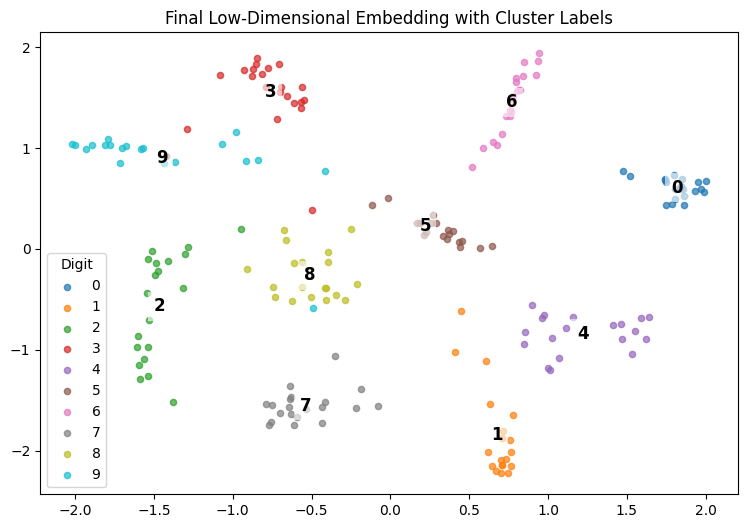

In [7]:
# Parameters
NUM_POINTS = 200
CLASSES_TO_USE = list(range(10))  # Digits 0-9
PERPLEXITY = 20
SEED = 42
MOMENTUM = 0.9
LEARNING_RATE = 10.
NUM_ITERS = 500
TSNE = False  # If True, use t-SNE

# RNG
rng = np.random.RandomState(SEED)

# Load digits
digits = load_digits()
X = digits.data
y = digits.target

# Filter to chosen classes & limit samples
mask = np.isin(y, CLASSES_TO_USE)
X = X[mask][:NUM_POINTS]
y = y[mask][:NUM_POINTS]

# Compute joint probabilities
P = p_joint(X, PERPLEXITY)

# Fit SNE or t-SNE
Y = estimate_sne(
    X, P, rng,
    num_iters=NUM_ITERS,
    q_fn=q_tsne if TSNE else q_joint,
    grad_fn=tsne_grad if TSNE else symmetric_sne_grad,
    learning_rate=LEARNING_RATE,
    momentum=MOMENTUM
)

# Single final plot with labels at cluster centers
plot_embedding(Y, y)